In [1]:
import networkx as nx
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy
from collections import deque
import seaborn as sns
from matplotlib.pyplot import cm

## Select parameters

In [2]:
prefType = 'LinNorm'
course = 506
lambdas = list(np.round(np.arange(0, 1, 0.1), 1)) + [1, 2, 5, 10]

In [3]:
lambdasToString = [str(l) for l in lambdas]
input_file = f'./csDS{course}_{prefType}.pickle'
if course == 519:
    numOfUniqueProjects = 7
elif course == 549:
    numOfUniqueProjects = 6
elif course == 506:
    numOfUniqueProjects = 14
elif course == 701:
    numOfUniqueProjects = 7

## Input analysis

In [4]:
def project_term(x):
    # Requires definition of lambda_
    res = 0
    # project preference term
    for u in nodes:
        for p in projects:
            if (u, p) in c and (u, p) in x:
                res += c[(u, p)] * x[(u, p)]
    return res

def conflict_term(x):
    res = 0
    for e in edges:
        u, v = e
        inner_sum = 0
        for p in projects:
            if (u, p) in x and (v, p) in x:
                inner_sum += x[(u, p)] * x[(v, p)]
        res += 1 * (1 - inner_sum)
    return res
    
def f(x):
    # Requires definition of lambda_
    return lambda_ * project_term(x) + conflict_term(x) 

In [5]:
with open(input_file, 'rb') as file:
    projects = pickle.load(file)
    capacities = pickle.load(file)
    numOfProjects = len(capacities)
    c = pickle.load(file)
    w = pickle.load(file)
    edges = pickle.load(file)
    wE = sum([w[e] for e in w])
    if '701' not in input_file:
        assignment = pickle.load(file)
    
G = nx.Graph()
G.add_edges_from(edges)
nodes = list(G.nodes)
n = len(nodes)
G_c = nx.complement(G)
pos=nx.spring_layout(G_c, k=0.2, iterations=20)

number of (conflict) edges = 13952
number of nodes = 168


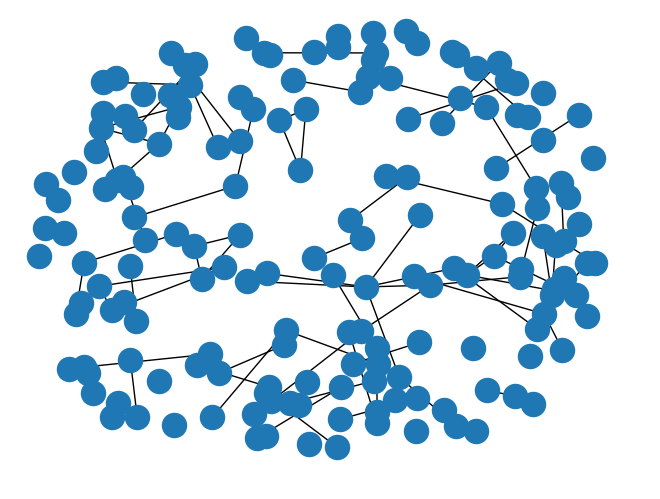

In [6]:
G_c = nx.complement(G)
    
print(f'number of (conflict) edges = {len(edges)}')
print(f'number of nodes = {len(G_c.nodes)}')
if len(G_c.nodes) < 100: 
    nx.draw(G_c, pos=pos, with_labels=True)
else:
    nx.draw(G_c, pos=pos)
# plt.title(f'Friends graph')
plt.savefig(f'./figs/friend_graph_{course}.pdf', bbox_inches='tight')
plt.show()

## Read the results

In [7]:
settings = dict()
results = dict()
times = dict()

for l in lambdasToString:
    results_file = f'results/csDS{course}_{l}_{prefType}.pickle'
    with open(results_file, 'rb') as file:
        settings[l] = pickle.load(file)
        edges = pickle.load(file)
        results[l] = pickle.load(file)
        times[l] = pickle.load(file)
        file.close()

In [8]:
obj_opt = dict()
obj_round12 = dict()
obj_round34 = dict()
obj_random = dict()
obj_greedy = dict()


x_round12 = dict()
x_round34 = dict()
x_opt = dict()
x_random = dict()
x_greedy = dict()

for i in range(len(lambdas)):
    l = lambdasToString[i]
    lambda_mul = lambdas[i]
    lambda_ = lambda_mul * sum(w.values()) / n

    res = results[l]
    
    x_opt[l] = res["quad_sol"]
    x_round12[l] = res["rounded_sol12"]
    x_round34[l] = res["rounded_sol34"]
    x_random[l] = res["random_sol"]
    x_greedy[l] = res["greedy_sol"]
    
    obj_opt[l] = f(x_opt[l])
    obj_round12[l] = f(x_round12[l])
    obj_round34[l] = f(x_round34[l])
    obj_random[l] = f(x_random[l])
    obj_greedy[l] = f(x_greedy[l])    

    print(f'\n======= lambda = {l} ==========')
    print(f'approx ratio (1/2 approx) = {obj_round12[l] / obj_opt[l]}')
    print(f'approx ratio (3/4 approx) = {obj_round34[l] / obj_opt[l]}')
    print(f'approx ratio (random) = {obj_random[l] / obj_opt[l]}')
    print(f'approx ratio (greedy) = {obj_greedy[l] / obj_opt[l]}')


======= lambda = 0.0 ==========
approx ratio (1/2 approx) = 0.9948333202824352
approx ratio (3/4 approx) = 0.9946028364288628
approx ratio (random) = 0.9745891551437053
approx ratio (greedy) = 0.999058857597915

======= lambda = 0.1 ==========
approx ratio (1/2 approx) = 0.9936653019136914
approx ratio (3/4 approx) = 0.9937945917700278
approx ratio (random) = 0.9640288885384822
approx ratio (greedy) = 0.998031171110596

======= lambda = 0.2 ==========
approx ratio (1/2 approx) = 0.9951077444799784
approx ratio (3/4 approx) = 0.9951682059525685
approx ratio (random) = 0.965206876506211
approx ratio (greedy) = 0.9987954461173575

======= lambda = 0.3 ==========
approx ratio (1/2 approx) = 0.9961312074619931
approx ratio (3/4 approx) = 0.9959690111474221
approx ratio (random) = 0.9329175483535657
approx ratio (greedy) = 0.9980907832561691

======= lambda = 0.4 ==========
approx ratio (1/2 approx) = 0.9963528258249349
approx ratio (3/4 approx) = 0.9962429737672278
approx ratio (random) = 

## Hyperparemeter ($\lambda$) tuning

In [9]:
ys = np.array([np.round(conflict_term(x_opt[l]), 2) for l in lambdasToString])
xs = np.array([np.round(project_term(x_opt[l]), 2) for l in lambdasToString])
zs = xs + ys
print("[" + ",".join([str(x) for x in xs]) + "]")
print("[" + ",".join([str(y) for y in ys]) + "]")

[86.43,155.57,157.29,158.0,158.36,158.36,158.57,158.57,158.57,158.57,158.57,158.57,158.57,158.57]
[13813.0,13799.0,13780.0,13765.0,13755.0,13755.0,13746.0,13746.0,13746.0,13746.0,13745.0,13746.0,13746.0,13746.0]


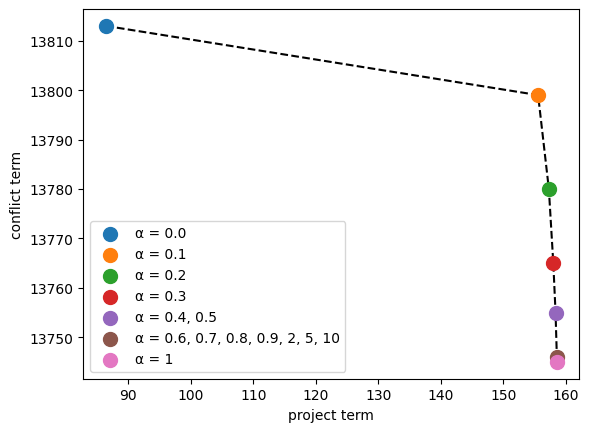

In [10]:
# Create a dictionary to group lambda values by (x, y) pairs
data_dict = {}
for i in range(len(lambdas)):
    xy_pair = (xs[i], ys[i])
    if xy_pair not in data_dict:
        data_dict[xy_pair] = []
    data_dict[xy_pair].append(lambdas[i])
    
# Create a scatter plot and label points with lambda values
for xy_pair, ls in data_dict.items():
    x, y = xy_pair
    label = 'α = ' + ', '.join([f"{l}" for l in ls])
    plt.scatter(x, y, label=label, s=100, zorder=2)  # s is marker size

plt.plot(xs, ys, linestyle='--', marker='', color='black', zorder=1)
plt.xlabel('project term')
plt.ylabel('conflict term')
plt.legend()
plt.savefig(f'./figs/hyperparameter_{course}_{prefType}.pdf', bbox_inches='tight')
plt.show()

### Reconstruct teams

In [11]:
def construct_teams(x):
    teams = dict()
    for p in projects:
        teams[p] = []

    for e in x:
        u, p = e
        if x[e] == 1:
            u, p = e
            teams[p].append(u)
            
    for p in projects:
        teams[p].sort()
        
    return teams
            
teams_opt = dict()
teams_round12 = dict()
teams_round34 = dict()
teams_random = dict()
teams_greedy = dict()
for l in lambdasToString:    
    teams_opt[l] = construct_teams(x_opt[l])
    teams_round12[l] = construct_teams(x_round12[l])
    teams_round34[l] = construct_teams(x_round34[l])
    
    teams_random[l] = construct_teams(x_random[l])
    teams_greedy[l] = construct_teams(x_greedy[l])

### Compare $\lambda \sum_v \sum_t c_{vt}x_{vt}$ and $w(E)$
If $\alpha = \lambda \sum_v \sum_t c_{vt}x_{vt} - w(E) \geq 0$, then we can apply the $3/4$-approximation algorithm.
Otherwise, the guarantees of the algorithm do not hold.

In [12]:
print(f'w(E) = {wE}')
for l, lstr in zip(lambdas, lambdasToString):
    lambda_ = l * wE / n
    projectsVal = lambda_ * project_term(x_round34[lstr])
    print(f'\n===== lambda = {l} ======')
    print(f'projects term value = {projectsVal}')
    print(f'a = {projectsVal - wE}')

w(E) = 13952

===== lambda = 0.0 ======
projects term value = 0.0
a = -13952.0

===== lambda = 0.1 ======
projects term value = 1316.897959183674
a = -12635.102040816326

===== lambda = 0.2 ======
projects term value = 2633.7959183673474
a = -11318.204081632652

===== lambda = 0.3 ======
projects term value = 3950.693877551019
a = -10001.306122448981

===== lambda = 0.4 ======
projects term value = 5267.591836734693
a = -8684.408163265307

===== lambda = 0.5 ======
projects term value = 6584.489795918368
a = -7367.510204081632

===== lambda = 0.6 ======
projects term value = 7901.387755102039
a = -6050.612244897961

===== lambda = 0.7 ======
projects term value = 9218.285714285716
a = -4733.714285714284

===== lambda = 0.8 ======
projects term value = 10535.183673469386
a = -3416.816326530614

===== lambda = 0.9 ======
projects term value = 11852.08163265306
a = -2099.9183673469397

===== lambda = 1 ======
projects term value = 13168.979591836734
a = -783.0204081632655

===== lambda = 

### Time (seconds) for each step

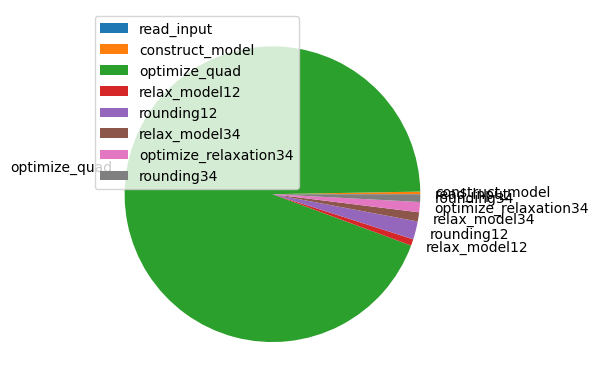

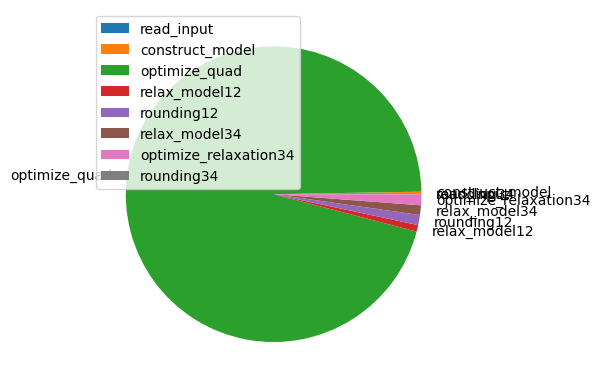

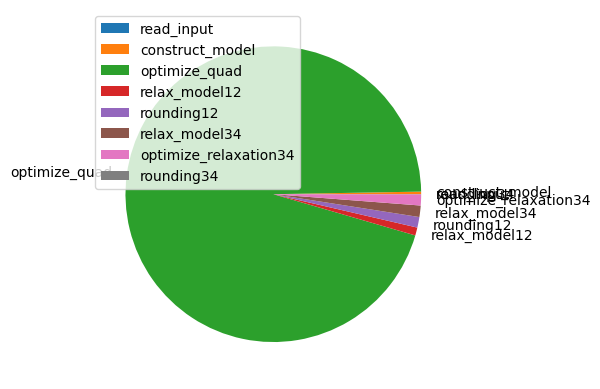

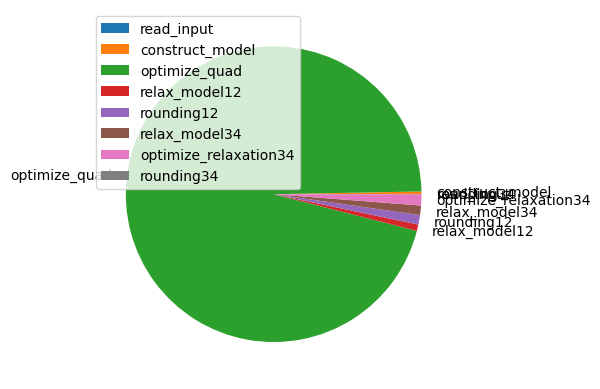

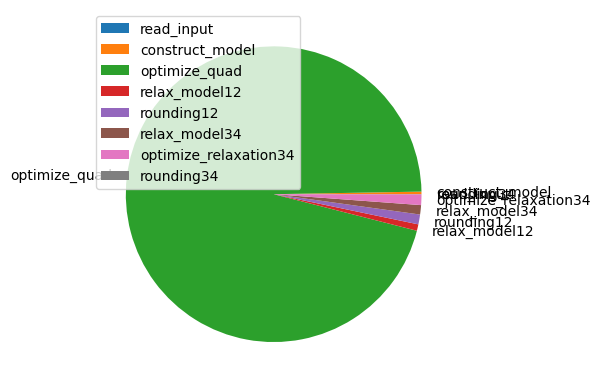

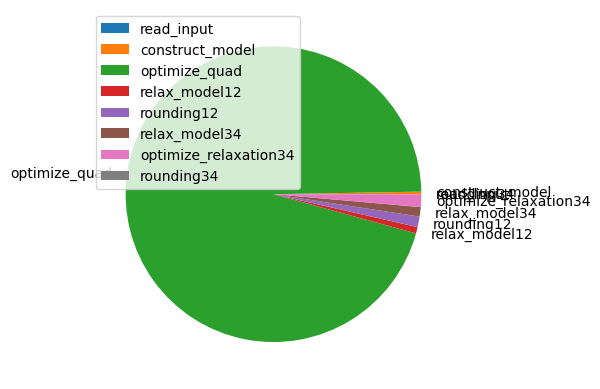

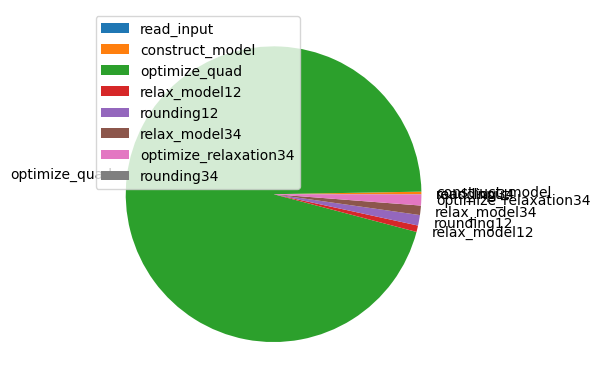

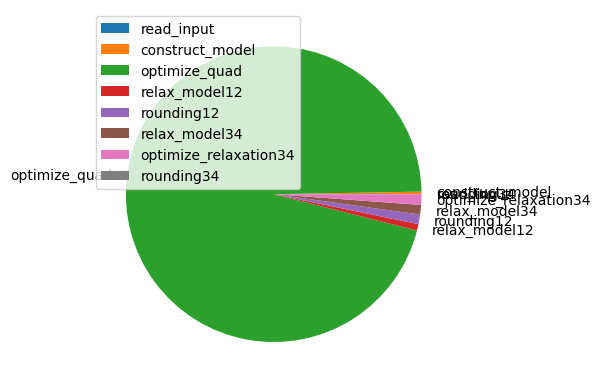

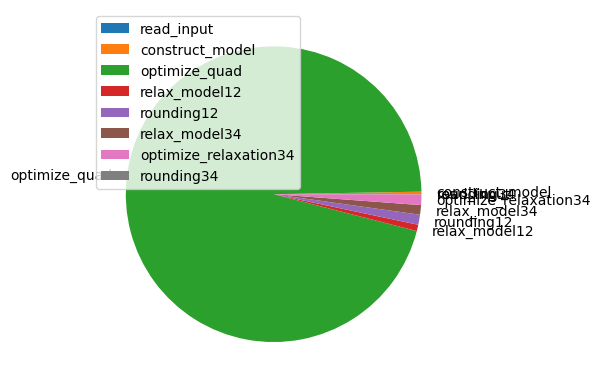

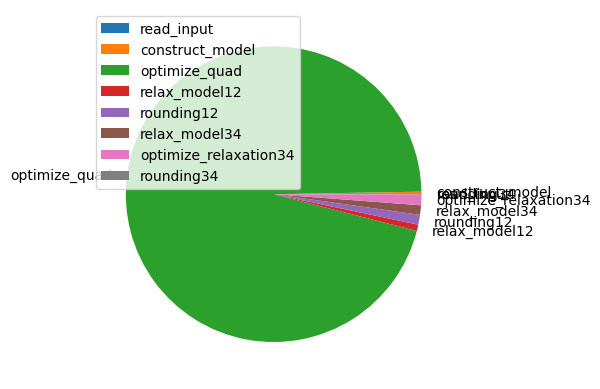

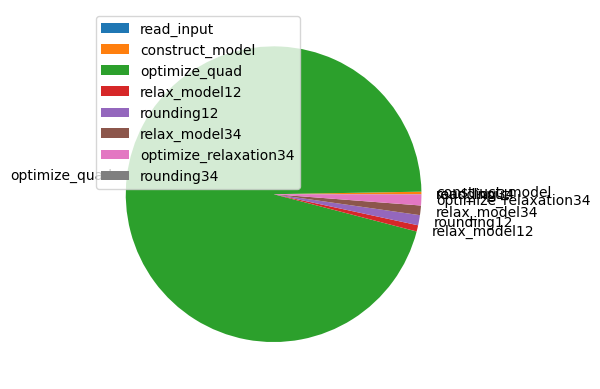

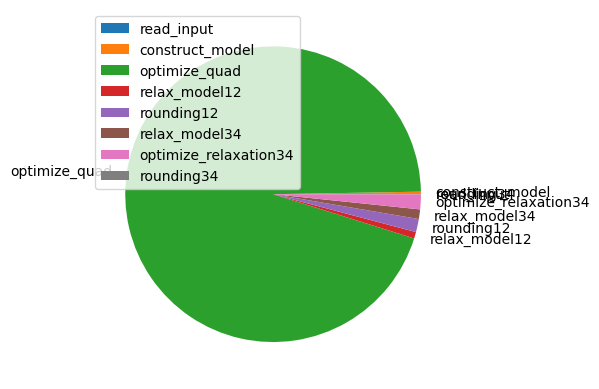

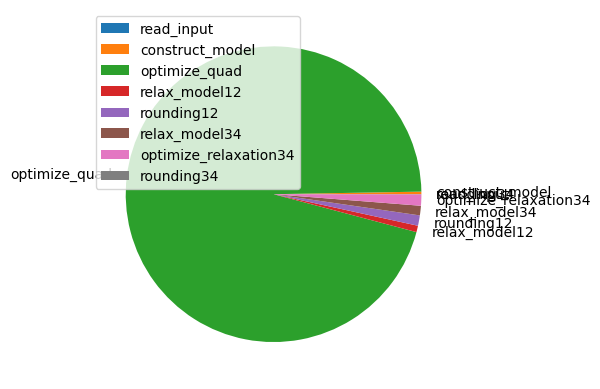

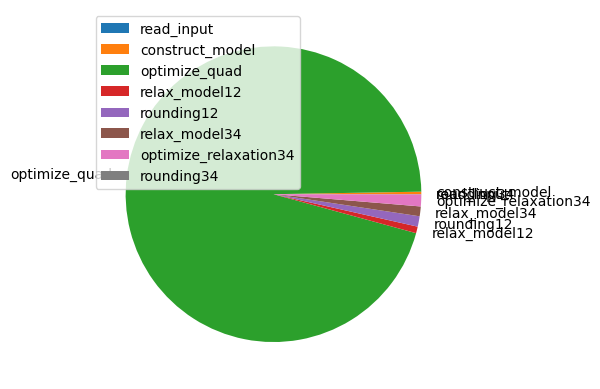

In [13]:
for l in lambdasToString:
    #del times["1.5"]["conflict_only"]
    plt.pie(times[l].values(), labels=times[l].keys(), normalize=True)
    plt.legend(loc='upper left')
    plt.show()

## Qualitative analysis

In [14]:
# Select a lambda
l = '0.6'

In [15]:
def min_friends(teams):
    minFriends = 2**30
    for team in teams.values():
        for u in team:
            friends = sum([1 for v in team if u != v and (u, v) not in w and (v, u) not in w])
            minFriends = min(friends, minFriends)
    if minFriends == 2**30:
        minFriends = 0
    return minFriends
            
def max_friends(teams):
    maxFriends = 0
    for team in teams.values():
        for u in team:
            friends = sum([1 for v in team if u != v and (u, v) not in w and (v, u) not in w])
            maxFriends = max(friends, maxFriends)
    return maxFriends

def avg_friends(teams):
    friends = []
    for team in teams.values():
        for u in team:
            friends.append(sum([1 for v in team if u != v and (u, v) not in w and (v, u) not in w]))
    friends = np.array(friends)
    avg, std = np.average(friends), np.std(friends)
    return avg, std

def reverse_pref(pref):
    if prefType == 'Lin':
        return numOfUniqueProjects - pref + 1
    elif prefType == 'LinNorm':
        return numOfUniqueProjects - pref*numOfUniqueProjects + 1
    elif prefType == 'Exp':
        return 1 / pref
    return 'Error: No preference type defined'

def min_preference(teams):
    ans = 1
    for t in teams:
        team = teams[t]
        for u in team:
            ans = min(ans, reverse_pref(c[(u, t)]))      
    return ans
            
def max_preference(teams):
    ans = -1
    for t in teams:
        team = teams[t]
        for u in team:
            ans = max(ans, reverse_pref(c[(u, t)]))      
    return ans

def avg_preference(teams):
    pref = []
    for t in teams:
        team = teams[t]
        for u in team:
            pref.append(reverse_pref(c[(u, t)]))
    pref = np.array(pref)
    avg, std = np.average(pref), np.std(pref)
    return avg, std

In [16]:
def group_keys_by_value(input_dict):
    grouped_dict = {}
    
    for key, value in input_dict.items():
        if value in grouped_dict:
            grouped_dict[value].append(key)
        else:
            grouped_dict[value] = [key]
    
    return grouped_dict
if '701' not in input_file:
    teams_manual = group_keys_by_value(assignment)

In [17]:
teams_optimal = teams_opt[l]
teams_pipage = teams_round12[l]
teams_randpipage = teams_round34[l]
teams_random = teams_random[l]
teams_greedy = teams_greedy[l]

### Average, min, max number of (in-team) friends for each student

In [18]:
print(f'max & avg & std\\')
algos = ['\\quadratic', '\\pipage', '\\randpip', '\\greedy', '\\random', '\\manual']
i = 0
for team in [teams_optimal, teams_pipage, teams_randpipage, teams_greedy, teams_random]:
    avg, std = np.round(avg_friends(team), 2)
    print(f'& {algos[i]} & {max_friends(team)} & {avg} & {std} \\\\')
    i += 1

max & avg & std\
& \quadratic & 3 & 0.71 & 0.79 \\
& \pipage & 1 & 0.05 & 0.22 \\
& \randpip & 1 & 0.09 & 0.29 \\
& \greedy & 3 & 0.65 & 0.74 \\
& \random & 0 & 0.0 & 0.0 \\


### Average number of project preference for each student

In [19]:
print(f'max & avg & std\\')
i = 0
for team in [teams_optimal, teams_pipage, teams_randpipage, teams_greedy, teams_random]:
    avg, std = np.round(avg_preference(team), 2)
    print(f'& {algos[i]} & {max_preference(team)} & {avg} & {std} \\\\')
    i += 1

max & avg & std\
& \quadratic & 14.0 & 1.79 & 2.43 \\
& \pipage & 14.0 & 1.8 & 2.49 \\
& \randpip & 14.0 & 1.81 & 2.51 \\
& \greedy & 14.0 & 1.95 & 2.5 \\
& \random & 14.0 & 7.22 & 3.82 \\


### Friends graph colored based on team assignment

In [20]:
def draw_graph_with_teams(teams, title=""):
    activeTeams = [t for t in teams if teams[t]]
#     colors = sns.color_palette("tab10", len(activeTeams))
    colors = cm.rainbow(np.linspace(0, 1, len(activeTeams)))

    colors_dict = dict(zip(sorted(activeTeams), colors))

    color_map = []
    for node in G:
        for team in teams:
            if node in teams[team]:
                color_map.append(colors_dict[team])
                break
    print(len(G_c.nodes))
    print(len(color_map))
    if len(G_c.nodes) < 100: 
        nx.draw(G_c, node_color=color_map, pos=pos, with_labels=True)
    else:
        nx.draw(G_c, node_color=color_map, pos=pos)

#     for node in G:
#         if representatives[node]:
#             x, y = pos[node]
#             plt.text(x + 0.09, y + 0.01, '*', fontsize=12, color='black', ha='center', va='center')
#     plt.title(title)
    if len(color_map) < 25:
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color, markeredgecolor=color) for color, label in zip(colors, colors_dict.keys())]
        plt.legend(handles=legend_handles)
    plt.savefig(f'./figs/graph_{course}_{l}_{prefType}.pdf', bbox_inches='tight')
    plt.show()

168
168


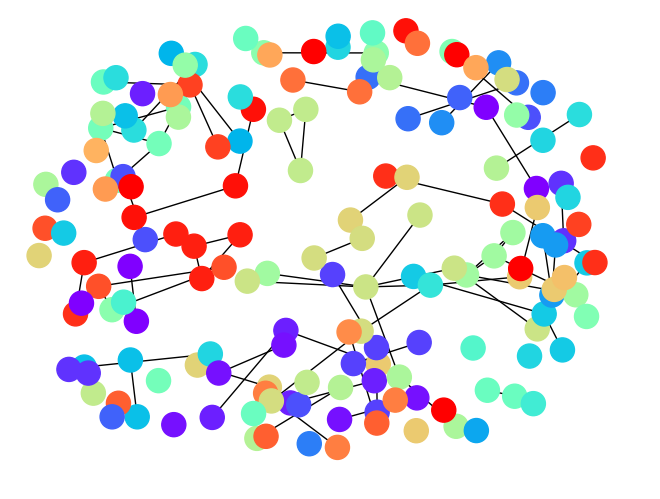

In [21]:
# draw_graph_with_teams(teams_manual, "Friends graph and teams (manual assignment)")
draw_graph_with_teams(teams_optimal)

## Competitive ratios

In [22]:
pref1 = 'Exp'
l1 = l
sol1 = dict()
pref2 = 'LinNorm'
l2 = l
sol2 = dict()

results_file1 = f'results/csDS{course}_{l1}_{pref1}.pickle'
results_file2 = f'results/csDS{course}_{l2}_{pref2}.pickle'
with open(results_file1, 'rb') as file:
    _ = pickle.load(file)
    _ = pickle.load(file)
    sol1 = pickle.load(file)
    _ = pickle.load(file)
    file.close()
with open(results_file2, 'rb') as file:
    _ = pickle.load(file)
    _ = pickle.load(file)
    sol2 = pickle.load(file)
    _ = pickle.load(file)
    file.close()
    
approx_ratios1 = dict()
approx_ratios2 = dict()
opt1 = f(sol1['quad_sol'])
opt2 = f(sol2['quad_sol'])
for key in sol1:
    if key != 'quad_sol':
        approx_ratios1[key] = f(sol1[key]) / opt1
        approx_ratios2[key] = f(sol2[key]) / opt2

In [23]:
sol1.keys()

dict_keys(['quad_sol', 'rounded_sol34', 'rounded_sol12', 'random_sol', 'greedy_sol'])

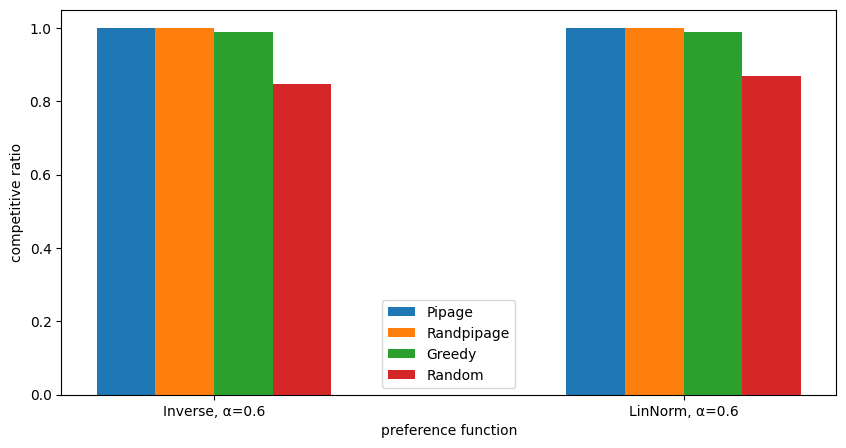

In [24]:
# Numbers of pairs of bars you want
N = 2

# Data on X-axis

pipage = (approx_ratios1['rounded_sol12'], approx_ratios2['rounded_sol12'])
randpipage = (approx_ratios1['rounded_sol34'], approx_ratios2['rounded_sol34'])
greedy = (approx_ratios1['greedy_sol'], approx_ratios2['greedy_sol'])
random = (approx_ratios1['random_sol'], approx_ratios2['random_sol'])

# Position of bars on x-axis
ind = np.array([1, 1.8])

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.1

# Plotting
plt.bar(ind, pipage , width, label='Pipage')
plt.bar(ind + width, randpipage, width, label='Randpipage')
plt.bar(ind + 2*width, greedy, width, label='Greedy')
plt.bar(ind + 3*width, random, width, label='Random')


plt.xlabel('preference function')
plt.ylabel('competitive ratio')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + 3*width / 2, (f'Inverse, α={l1}', f'{pref2}, α={l2}'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.savefig(f'./figs/competitive{course}_{l1}_{l2}.png', bbox_inches='tight')
plt.show()